<a href="https://colab.research.google.com/github/soyeonkimgithub/AWA/blob/main/Volatility_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn xgboost
!pip install --upgrade pandas_datareader
!pip install holidays
!pip install -U arch
!pip install pycryptodome pycryptodomex
!pip uninstall --yes pandas-datareader
!pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
  Attempting uninstall: pandas_datareader
    Found existing installation: pandas-datareader 0+untagged.811.gea66d6b
    Uninstalling pandas-datareader-0+untagged.811.gea66d6b:
      Successfully uninstalled pandas-datareader-0+untagged.811.gea66d6b


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: pandas-datareader 0.10.0
Uninstalling pandas-datareader-0.10.0:
  Successfully uninstalled pandas-datareader-0.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/raphi6/pandas-datareader.git (to revision ea66d6b981554f9d0262038aef2106dda7138316) to /tmp/pip-req-build-vq9pgabr
  Running command git clone --filter=blob:none --quiet https://github.com/raphi6/pandas-datareader.git /tmp/pip-req-build-vq9pgabr
  Running command git rev-parse -q --verify 'sha^ea66d6b981554f9d0262038aef2106dda7138316'
  Running command git fetch -q https://github.com/raphi6/pandas-datareader.git ea66d6b981554f

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import os
import time
import pandas_datareader.data as web
from datetime import timedelta, datetime
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.tseries.offsets import BDay
import pickle
import math
from arch import arch_model
import pandas_datareader as pdr
print(pdr.__version__)
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline
#from xgboost import XGBRegressor
import xgboost as xgb
print(xgb.__version__)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

0+untagged.811.gea66d6b
0.90


# Security Volatility forecasting
- goal: predict security volatility using using machine learning
- input : specific security close vlaue  
- target : VIX which represents the volatility in stock market

## Volatility
- volatility is how much and how quickly prices move over a given span of time
- Standard deviation is the most common way to measure volatility
- Maxinum ddrawdown is another way to measure stoci price volatility
- Beta measures volatility relative to the stock market
- The CBOE volatility index is a common metric used to measure the expected volatility of the S&P 500

### Standard Deviation

In [ ]:
def pricePlot(df_plot, col) :
  fig = go.Figure()
  fig.add_trace(
    go.Scatter(
      x = df_plot.index, 
      y = df_plot[col],
      mode = 'lines',
      name = col)
  )
  fig.update_xaxes(title_text="Date")
  fig.update_yaxes(title_text=col)
  fig.show()  

In [ ]:
def std(ticker, start, end, plot) :
  #prices = web.DataReader(ticker, 'yahoo', start=start, end=end)
  prices = pdr.get_data_yahoo(ticker, start=start, end=end)

  # PCT
  returns = 100 * prices.Close.pct_change().dropna() 
  prices['returns'] = returns

  # STD
  daily_volatility = returns.std()
  print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

  monthly_volatility = math.sqrt(21) * daily_volatility
  print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

  annual_volatility = math.sqrt(252) * daily_volatility
  print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

  if plot :
    pricePlot(prices, 'Close')

  return prices

In [ ]:
def std2(ticker, start, end, plot) :
  #prices = web.DataReader(ticker, 'yahoo', start=start, end=end)
  prices = pdr.get_data_yahoo(ticker, start=start, end=end)

  # PCT
  returns = prices.Close.pct_change().dropna() 
  prices['returns'] = returns

  print(prices)
  # STD
  daily_volatility = returns.std()
  print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

  monthly_volatility = math.sqrt(21) * daily_volatility
  print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

  annual_volatility = math.sqrt(252) * daily_volatility
  print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

  if plot :
    pricePlot(prices, 'Close')

  return prices

In [ ]:
prices = std('KO', dt.datetime(2010, 1, 1), dt.datetime(2023, 1, 8), True)

[*********************100%***********************]  1 of 1 completed
Daily volatility:  1.11%
Monthly volatility:  5.09%
Annual volatility:  17.62%


In [ ]:
prices = std2('KO', dt.datetime(2010, 1, 1), dt.datetime(2023, 1, 8), True)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2010-01-04  28.580000  28.610001  28.450001  28.520000  19.081615  13870400   
2010-01-05  28.424999  28.495001  28.070000  28.174999  18.850788  23172400   
2010-01-06  28.174999  28.219999  27.990000  28.165001  18.844097  19264600   
2010-01-07  28.165001  28.184999  27.875000  28.094999  18.797266  13234600   
2010-01-08  27.730000  27.820000  27.375000  27.575001  18.449352  28712400   
...               ...        ...        ...        ...        ...       ...   
2022-12-30  63.919998  63.919998  63.169998  63.610001  63.610001   7649400   
2023-01-03  63.560001  63.560001  62.180000  62.950001  62.950001  12180500   
2023-01-04  63.150002  63.330002  62.509998  62.919998  62.919998  13387900   
2023-01-05  62.599998  62.799999  62.080002  62.200001  62.200

In [ ]:
prices = std('TSLA', dt.datetime(2010, 1, 1), dt.datetime(2023, 1, 8), True)

[*********************100%***********************]  1 of 1 completed
Daily volatility:  3.61%
Monthly volatility:  16.52%
Annual volatility:  57.23%


### VIX
- options are rights, not obligations to buy or sell an asset in the future at a fixed price called strike
- the main key input in options is volatility
- if the volatility is going up, volatility is generally negatively correlated with the assets' returns, then this signals fear in the market
- Chicago Board Options Exchanges introduced the CBOE Volatility Index, VIX - the benchmark for stock market volatility
- Volatility indices of US(VIX), China(HSI), and Japan(Nikkei) 

In [ ]:
vix = std('^VIX', dt.datetime(2010, 1, 1), dt.datetime(2023, 1, 8), True)

[*********************100%***********************]  1 of 1 completed
Daily volatility:  8.34%
Monthly volatility:  38.22%
Annual volatility:  132.39%


In [ ]:
## S&P 500 & VIX
sp500 = pdr.get_data_yahoo('^GSPC', dt.datetime(2010, 1, 1), dt.datetime(2023, 1, 11))
sp500_vix_df = pd.merge(sp500[['Close']], vix[['Close']], on=["Date"])
sp500_vix_df.columns = ['sp500', 'vix']

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=sp500_vix_df.index, y=sp500_vix_df['sp500'], name="S&P 500"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=sp500_vix_df.index, y=sp500_vix_df['vix'], name="VIX"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="S&P500", secondary_y=False)
fig.update_yaxes(title_text="VIX", secondary_y=True)

fig.show()

[*********************100%***********************]  1 of 1 completed


In [ ]:
ticker = "KO"
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2023, 1, 8) 

## GARCH
is an widely used econometric model to estimate historical volatility.

GARCH estimates the historical volatility in Day n with:
- Rate of Return (of an underlying asset) in Day n-1 (denoted by  𝑢 )
- Volatility in Day n-1 (denoted by  𝜎 )
- Note that  𝜎2  is often referred to Variance

There are three coefficients in the model:
- alpha, coefficent of  𝑢2 - corresponding to lagging days of time series
- beta, coefficient of  𝜎2 - volatility
- omega, constant (It is actually not just a constant, but we will make it simple here.)

The formula for estimating (historical) volatility of Day n is:
- 𝜎2𝑛=𝜔+𝛼𝑢2𝑛−1+𝛽𝜎2𝑛−1


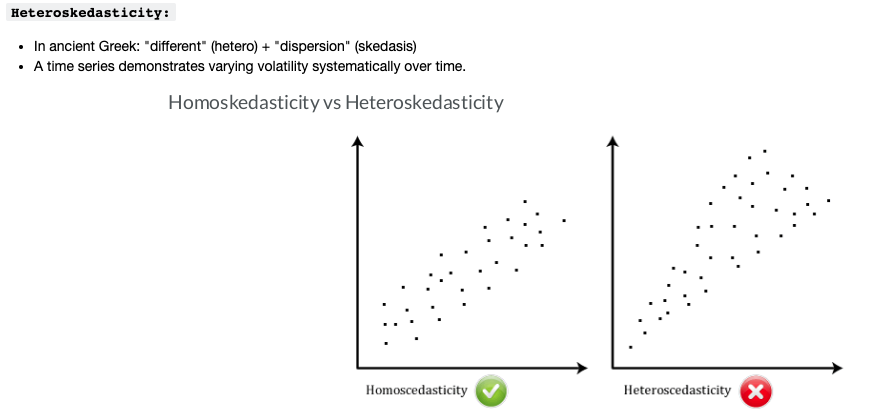

### S&P 500

In [ ]:
returns = 100 * sp500.Close.pct_change().dropna()
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*2:])

In [ ]:
fig = go.Figure([
    go.Scatter(
        name='True Daily Returns',
        x=returns[-365*5:].index,
        y=returns[-365*5:],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)')
    ),
    go.Scatter(
        name='Volatility Prediction',
        x=returns[-365*2:].index,
        y=rolling_predictions,
        mode='lines',
        line=dict(color='rgb(255, 100, 146)')
    )
])
fig.update_layout(
    title='S&P500 Daily Return and volatility Prediction',
    hovermode="x"
)
fig.show()

In [ ]:
def train_test_split(df, perc, plot=None):
  data = df.values
  n = int(len(data) * (1 - perc))
  if plot:
    # plot training and test set
    fig, ax = plt.subplots(figsize=(15,5))
    df.iloc[:n,:].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
    df.iloc[n:,:].plot(ax=ax, label='Test Set')
    ax.legend(['Training Set', 'Test Set'])
    plt.show()

  return data[:n], data[n:], df.iloc[:n,:].index[-1]

In [ ]:
prices = pdr.get_data_yahoo(ticker, start=start, end=end)
returns = 100 * prices.Close.pct_change().dropna() 

[*********************100%***********************]  1 of 1 completed


In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_pacf(returns**2)
# plt.show()

In [ ]:
stock = returns.to_frame()
stock.rename(columns={'Close':'return'}, inplace=True)

garch_model = arch_model(stock['return'], p=3, q=1, mean='constant', vol='GARCH', dist='normal')
gm_result = garch_model.fit(disp='off')

In [ ]:
# about model
print(gm_result.summary())
print(gm_result.params)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4643.09
Distribution:                  Normal   AIC:                           9298.19
Method:            Maximum Likelihood   BIC:                           9334.75
                                        No. Observations:                 3275
Date:                Thu, Jan 12 2023   Df Residuals:                     3274
Time:                        04:26:04   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0399  1.831e-02      2.180  2.928e-02 [4.

In [ ]:
# gm_forecast = gm_result.forecast(horizon = 5)
# print(gm_forecast.variance[-1:])

In [ ]:
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = stock['return'][:-(test_size-i)]
    garch_model = arch_model(train, p=3, q=1)
    model_fit = garch_model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
# rolling_predictions = pd.Series(rolling_predictions, index=stock['return'].index[-365:])

# plt.figure(figsize=(10,4))
# plt.plot(rolling_predictions)
# plt.title('Rolling Prediction')
# plt.show()

In [ ]:
fig = go.Figure([
    go.Scatter(
        name='True Daily Returns',
        x=stock['return'][-365*5:].index,
        y=stock['return'][-365*5:],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)')
    ),
    go.Scatter(
        name='Volatility Prediction',
        x=stock['return'][-365*2:].index,
        y=rolling_predictions,
        mode='lines',
        line=dict(color='rgb(255, 100, 146)')
    )
])
fig.update_layout(
    title = ticker + ' Daily Return and Volatility Prediction',
    hovermode="x"
)
fig.show()

### Validation

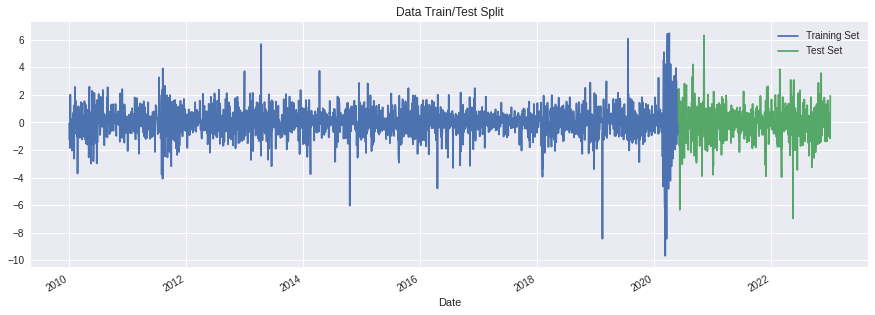

In [ ]:
train, test, train_endDate = train_test_split(stock, 0.2, True)

In [ ]:
def validateGarch(data, perc):
  predictions = []
  train, test, train_endDate = train_test_split(data[['return']], perc, False)
  history = [x for x in train]
  
  for i in range(len(test)):
    test_X, test_y = test[i, :-1], test[i, -1]

    garch_model = arch_model(history, p=3, q=1)
    model_fit = garch_model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    history.append(test[i])

  error = mean_squared_error(test[:, -1], predictions, squared=False)
  return error, test[:, -1], predictions  

In [ ]:
%%time
# XGBoost : 1.1229633316585925
# 1.6349511583398963 *best
# 5.546583672111873 for TSLA
rmse, y, pred = validateGarch(stock, 0.2)
print(rmse)

1.6341583714061458
CPU times: user 35 s, sys: 192 ms, total: 35.2 s
Wall time: 37 s


In [ ]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

fig = go.Figure()
fig.add_trace(
  go.Scatter(
    x = future_dates, 
    y = pred,
    mode = 'lines'
    )
)
fig.update_layout(
    title='Volatility Prediction - Next 7 Days',
    hovermode="x"
)

fig.show()  

## XGBoost


In [ ]:
def train_test_split_df(df, perc):
  data = df.values
  n = int(len(data) * (1 - perc))
  return df.iloc[:n,:], df.iloc[n:,:]

In [ ]:
prices = pdr.get_data_yahoo(ticker, start=start, end=end)
returns = 100 * prices.Close.pct_change().dropna() 
stock = returns.to_frame()
stock.rename(columns={'Close':'return'}, inplace=True)

df = pd.merge(vix[['Close']], stock[['return']], on=["Date"])
df.columns = ['vix', 'target']
origin_df = df.copy() # keep for plot later

to_normalize = ['vix', 'target']
mean_train = df[to_normalize].mean()
std_train = df[to_normalize].std()
df[to_normalize] = (df[to_normalize]-mean_train)/std_train


[*********************100%***********************]  1 of 1 completed


In [ ]:
# duplicated with below
def xgb_forecast(data, ver=100, train_endDate=None) :
  
  FEATURES = ['vix']
  TARGET = 'target'

  train, test = train_test_split_df(df, 0.2)
  
  if isinstance(data, pd.DataFrame):
    endDate = data.index[-1]
  else:
    endDate = train_endDate
  
  nextDate = endDate + timedelta(days=7-endDate.weekday() if endDate.weekday()>3 else 1)

  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]
  y_test = test[TARGET]

  X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
  X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
  
  model = xgb.XGBRegressor(n_estimators=500, 
                          early_stopping_rounds=50, 
                          learning_rate=0.001)
  model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_test, y_test)], 
            verbose=ver)
  pred = model.predict(X_test)
  return pred[0]  

In [ ]:
def xgb_forecast_df(data, ver=100, train_endDate=None) :
  
  FEATURES = ['vix']
  TARGET = 'target'

  train, test = train_test_split_df(df, 0.2)
  
  if isinstance(data, pd.DataFrame):
    endDate = data.index[-1]
  else:
    endDate = train_endDate
  
  nextDate = endDate + timedelta(days=7-endDate.weekday() if endDate.weekday()>3 else 1)

  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]
  y_test = test[TARGET]

  X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
  X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
  
  model = xgb.XGBRegressor(n_estimators=1000, 
                          early_stopping_rounds=50, 
                          learning_rate=0.001)
  model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_test, y_test)], 
            verbose=ver)
  pred = model.predict(X_test)
  
  newRow = pd.Series({'target':pred[0]}, name=nextDate.to_pydatetime())
  data = data.append(newRow)

  return data

In [ ]:
df_predic = xgb_forecast_df(df, 100)

[04:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.09957	validation_1-rmse:1.18695
[100]	validation_0-rmse:1.06896	validation_1-rmse:1.16767
[200]	validation_0-rmse:1.04286	validation_1-rmse:1.15157
[300]	validation_0-rmse:1.02066	validation_1-rmse:1.13815
[400]	validation_0-rmse:1.0018	validation_1-rmse:1.12731
[500]	validation_0-rmse:0.985717	validation_1-rmse:1.11848
[600]	validation_0-rmse:0.972012	validation_1-rmse:1.11118
[700]	validation_0-rmse:0.96034	validation_1-rmse:1.10513
[800]	validation_0-rmse:0.950399	validation_1-rmse:1.09995
[900]	validation_0-rmse:0.94193	validation_1-rmse:1.09564
[999]	validation_0-rmse:0.934779	validation_1-rmse:1.09212


In [ ]:
df_predic.tail()

,vix,target
Date,,
2023-01-03,0.573569,-0.962460
2023-01-04,0.451775,-0.070502
2023-01-05,0.513356,-1.058632
2023-01-06,0.331349,1.710802
2023-01-09,NaN,0.193640


In [ ]:
def forecasePlot(df_predic, endDate, todayReturn=None):
  
  if endDate :
    lastDate = endDate + BDay(1)
    nextDate = endDate + timedelta(days = 7-endDate.weekday() if endDate.weekday()>3 else 1)
    prevDate = endDate - timedelta(days = 7-endDate.weekday() if endDate.weekday()>3 else 1)

  print(endDate, lastDate, nextDate, prevDate)
  fig = go.Figure()

  fig.add_trace(
    go.Scatter( 
      x = df_predic.index, 
      y = df_predic['target'].where(endDate >= df_predic.index),
      mode = 'lines+markers',
      name = "True Daily Returns",
      line=dict(color='rgb(31, 119, 180)')
    )
  ),
  fig.add_scattergl (
    x = df_predic.index, 
    y = df_predic['target'].where(endDate < df_predic.index),
    line_color='rgb(231,107,243)',
    mode = 'lines+markers',
    name='Volatility Prediction',
    line=dict(color='rgb(255, 100, 146)')
  )

  if todayReturn :
    fig.add_trace(
      go.Scatter(
        x = [nextDate], 
        y = [todayReturn],
        marker = dict(color="#444"),
        name = 'Today'
      )
    )
  fig.show()

forecasePlot(df_predic, end, None)  

2023-01-08 00:00:00 2023-01-09 00:00:00 2023-01-09 00:00:00 2023-01-07 00:00:00


### Validation

In [ ]:
def validate(data, perc):
  predictions = []
  train, test, train_endDate = train_test_split(data[['vix','target']], perc, False)
  history = [x for x in train]

  for i in range(len(test)):
    test_X, test_y = test[i, :-1], test[i, -1]
    pred = xgb_forecast(history, False, train_endDate)
    predictions.append(pred)
    history.append(test[i])

  error = mean_squared_error(test[:, -1], predictions, squared=False)
  return error, test[:, -1], predictions    

In [ ]:
%%time
# 1.122719546351428 KO *best
# 1.1568824893794092 TSLA
rmse, y, pred = validate(df_predic, 0.2)
print(rmse)

[04:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Test

In [ ]:
df_test = pd.DataFrame()

def forecastVol(ticker, startDate, endDate, todayPrice):
  prices = pdr.get_data_yahoo(ticker, start=start, end=end)
  price_df = prices[['Close']].copy()

  returns = 100 * prices.Close.pct_change().dropna()
  return_df = returns.to_frame()
  return_df.rename(columns={'Close':'return'}, inplace=True)

  todayReturn = (todayPrice-price_df.iloc[-1,0])/price_df.iloc[-1,0]*100

  vix = pdr.get_data_yahoo('^VIX', startDate, endDate)
  df = pd.merge( vix[['Close']], return_df[['return']], on=["Date"])
  df.columns = ['vix', 'target']

  origin_df = df.copy() 
  to_normalize = ['vix', 'target']
  mean_train = df[to_normalize].mean()
  std_train = df[to_normalize].std()
  df[to_normalize] = (df[to_normalize]-mean_train)/std_train
  train, test, train_endDate = train_test_split(df, 0.2, False)

  df_test = xgb_forecast_df(df, False)
  print('')
  print(f'- ticker {ticker:10}')
  print(f'- from {startDate} to {endDate}')
  print(f'- today price {todayPrice}')
  print(f'- today daily return {todayReturn}')
  print(f'- predicted volatility {df_test.iloc[-1, 1]}')
  print(f'- difference {round((todayReturn - df_test.iloc[-1, 1])/df_test.iloc[-1, 1] *100,2):2}%')

  # plot 
  forecasePlot(df_test, endDate, todayReturn)

  return df_test

In [ ]:
final_df = forecastVol(
            'KO',
            dt.datetime(2010, 1, 1), 
            dt.datetime(2023, 1, 8), 
            61)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[04:31:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

- ticker KO        
- from 2010-01-01 00:00:00 to 2023-01-08 00:00:00
- today price 61
- today daily return -3.7854912746323235
- predicted volatility 0.1936403214931488
- difference -2054.91%
2023-01-08 00:00:00 2023-01-09 00:00:00 2023-01-09 00:00:00 2023-01-07 00:00:00
